## Background
This question comes from a cartoon
![source of the question](https://imgs.xkcd.com/comics/nerd_sniping.png)
The solution technique is based on [SPICE circuit simulation](https://ewh.ieee.org/soc/emcs/acstrial/newsletters/summer09/HowSpiceWorks.pdf)

In [5]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as la
import matplotlib.pyplot as plt

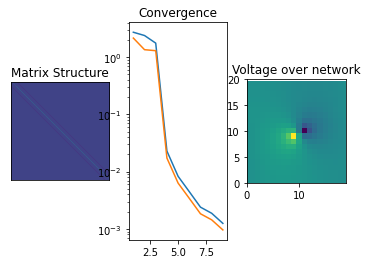

Req = 0.769 Ohms


In [2]:
# variables to control scope of output
G = None
V = None
P = np.empty((0,))
R = np.empty((0,))

for p in range(0,10): # increase padding until answer converges
    # set up the grid parameters
    m = 2 + 2*p
    n = 3 + 2*p
    q = m*n - 1
    
    # getting ready to build the matrix...
    data = np.empty((0,))
    row = np.empty((0,))
    col = np.empty((0,))
    
    d = 4*np.ones(n)
    d[0] = 3
    d[-1] = 3
    
    # diagonal
    data = np.hstack((data, d-1, np.tile(d, m-2), d[:-1]-1))
    row = np.hstack((row, np.arange(q)))
    col = np.hstack((col, np.arange(q)))

    # upper off diagonal
    data = np.hstack((data, -np.ones(q-1)))
    row = np.hstack((row, np.arange(q-1)))
    col = np.hstack((col, np.arange(q-1)+1))

    # lower off diagonal
    data = np.hstack((data, -np.ones(q-1)))
    row = np.hstack((row, np.arange(q-1)+1))
    col = np.hstack((col, np.arange(q-1)))

    # upper row coupling
    data = np.hstack((data, -np.ones(q-n)))
    row = np.hstack((row, np.arange(q-n)))
    col = np.hstack((col, np.arange(q-n)+n))

    # lower row coupling
    data = np.hstack((data, -np.ones(q-n)))
    row = np.hstack((row, np.arange(q-n)+n))
    col = np.hstack((col, np.arange(q-n)))
    
    # finally assembly pieces into matrix G
    G = sp.csc_matrix((data, (row, col)), shape=(q, q))

    # find middle squares separated by a knight's move
    a = int(n*(m/2-1) + (n-3)/2)
    b = int(n*m/2 + (n+1)/2)
    
    # insert 1A current source between 'a' and 'b'
    
    if p == 0: # handle no padding as special case
        I = sp.csc_matrix(([1], ([a], [0])), shape=(q,1)) 
    else:
        I = sp.csc_matrix(([1, -1], ([a, b], [0, 0])), shape=(q,1))
    
    # solve the matrix problem
    V = la.spsolve(G, I)
    V = np.hstack((V, 0))
    V = V - V[b] # use point b as ground
    P = np.hstack((P, p))
    R = np.hstack((R, V[a])) # Req = voltage developed at 'a' / 1 Amp

# plots
fig = plt.figure()
plt.subplot(131)
#plt.spy(G)
plt.imshow(G.toarray())
plt.xticks([])
plt.yticks([])
plt.title('Matrix Structure')
plt.subplot(132)
plt.semilogy(P[1:], np.diff(R)/R[1:], label='relative error')
plt.semilogy(P[1:], np.abs(np.diff(R)), label='absolute error')
plt.title('Convergence')
plt.subplot(133)
plt.imshow(np.reshape(V, (m, n)), cmap='viridis')
plt.axis([(m/2-1)-min(P[-1], 10), m/2+min(P[-1], 10), \
          (n-3)/2-min(P[-1], 10), (n+1)/2+min(P[-1], 10)])
plt.title('Voltage over network')
plt.show()
fig.tight_layout()

# display answer
print(f'Req = {R[-1]:0.3f} Ohms')

## Analytical Solution
[This website](https://www.mathpages.com/home/kmath668/kmath668.htm) offers an exact analytical procedure that finds the answer to be:
    $$\frac{4}{\pi} - \frac{1}{2}$$

In [41]:
# Actual answer
Ractual = 4/np.pi - 1/2
print(f'Ractual = {Ractual:0.3f} Ohms')

Ractual = 0.773 Ohms
